In [92]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [93]:
df = pd.read_csv('Ecommerce_Customers.csv')

In [94]:
df.tail(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [96]:
df.duplicated().sum()

0

In [97]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [98]:
df['Avatar'].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

In [99]:
df.drop(['Avatar'] , axis=1 , inplace = True)

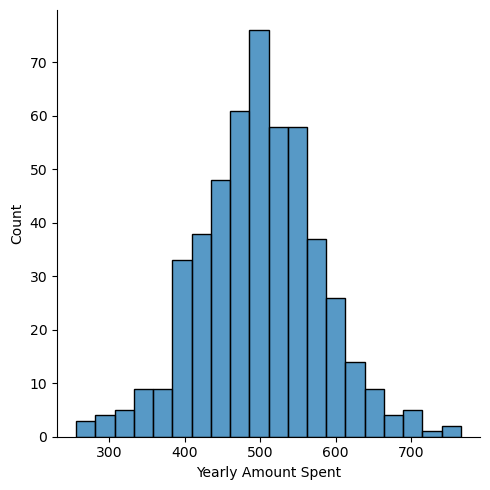

In [100]:
sns.displot(data = df , x='Yearly Amount Spent')

In [101]:
df['Domain']=df['Email'].apply(lambda x: x.split('@')[1].split('.')[0])

In [102]:
df['Domain'].value_counts()

gmail             87
hotmail           87
yahoo             76
jones              3
johnson            3
                  ..
carson-hansen      1
scott              1
bennett-branch     1
ellis-parker       1
davidson           1
Name: Domain, Length: 236, dtype: int64

In [103]:
df.drop(['Domain'] , axis =1 , inplace = True)

In [104]:
df['name']=df['Email'].apply(lambda x: x.split('@')[0])

In [105]:
df.drop(['Email'] , axis=1 , inplace = True)

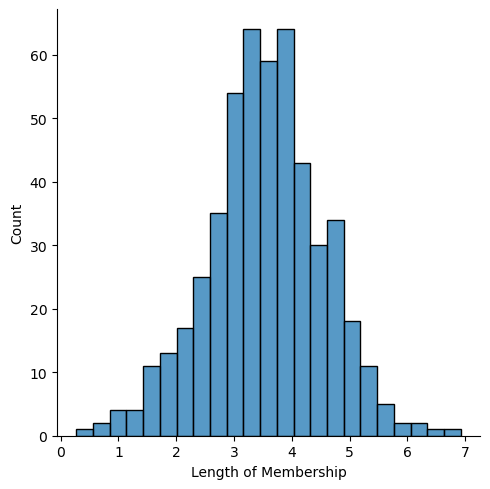

In [106]:
sns.displot(data = df ,  x='Length of Membership')

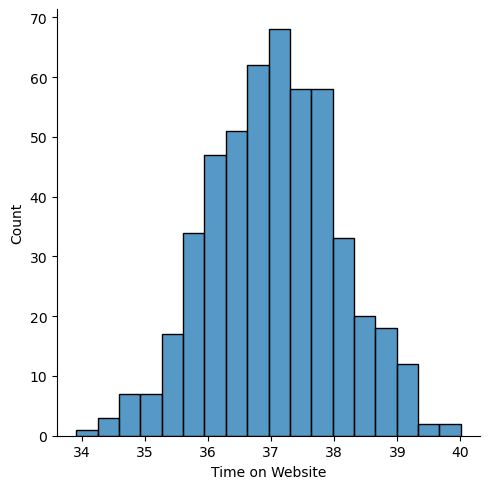

In [107]:
sns.displot(data = df , x='Time on Website')

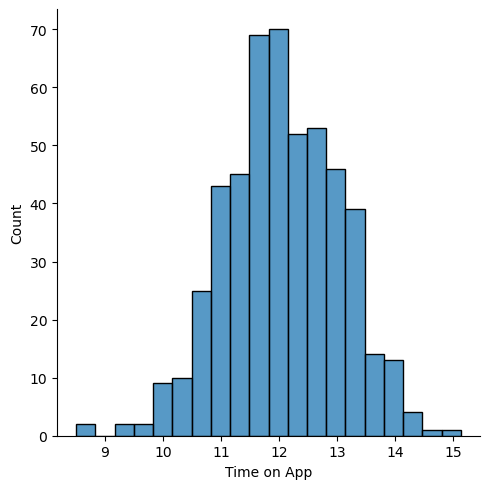

In [108]:
sns.displot(data = df , x='Time on App')

In [109]:
df1 = df.sample(10)

In [110]:
df.drop(['Address'] , axis = 1 , inplace=True)

In [111]:
df.drop(['name'],axis = 1 , inplace =True)

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x = df.drop(['Yearly Amount Spent'] , axis =1)
y = df['Yearly Amount Spent']

In [114]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=7)

# scalling 

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()

In [117]:
df.reset_index(inplace =True , drop=True )

In [118]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [119]:
to_scalled= x_train.columns.tolist()
to_scalled

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

In [121]:
x_train[to_scalled] = scaler.fit_transform(x_train[to_scalled])

In [122]:
x_test[to_scalled] = scaler.fit_transform(x_test[to_scalled])

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
model = LinearRegression()

In [125]:
model.fit(x_train,y_train)

LinearRegression()

In [127]:
y_pred=model.predict(x_test)

In [128]:
y_pred

array([621.49308843, 559.92759986, 546.75769963, 576.68945523,
       586.84746212, 493.17103323, 517.69826931, 535.48295913,
       598.10061317, 451.35143358, 450.03673103, 532.82159311,
       394.53102226, 501.36798202, 561.23477693, 553.22874976,
       485.98061356, 495.80172405, 508.86483977, 548.26674845,
       481.99332827, 444.50139562, 527.90011118, 390.07043811,
       725.04859116, 530.28887374, 503.48783292, 611.59943171,
       427.80401518, 398.7205501 , 426.71741882, 498.03709274,
       438.32831394, 572.93848767, 479.01104638, 407.71930443,
       531.2944849 , 537.86417472, 492.39179756, 385.99523388,
       502.83528807, 400.41477311, 619.5510066 , 519.2887744 ,
       562.70955123, 406.20306498, 514.45423661, 401.82953405,
       456.65972741, 501.78244918, 395.07221278, 321.46061404,
       476.74250908, 678.08567897, 551.68621091, 444.23943289,
       445.38771597, 388.51572128, 515.11086334, 538.60904068,
       435.16924849, 518.22080165, 569.70140738, 384.01

In [129]:
from sklearn.metrics import mean_squared_error , r2_score

In [130]:
mean_squared_error(y_test , y_pred , squared=False)

12.545850468186613

In [131]:
r2_score(y_test , y_pred)

0.9744047134354545